# Extract, Transform & Load (ETL) Challenge

#### Team Lead 
* Kayli Aguilera

#### Team Members:
* Adrian Aguilar
* Charlie Freeman  
* Mychele Larson
* Madeline Vicuna

We are a group of insurance salespeople who are trying to predict insurance costs.  We will examine relationships between gender, number of children and previous health concerns to determine correlations (if any). Specifically, we will disect two datasets to determine whether it's achieveable.

#### Data Sources

https://www.kaggle.com/datasets/mirichoi0218/insurance  
https://www.kaggle.com/datasets/karimnahas/medicaldata  
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease  

#### Data Cleansing/Transformation

These datasets are CSV files where we will extract the data into DataFrames before analyzation.  
Both datasets were fairly clean upon extraction ie. no null values, therefore, we did not have to delete any rows/columns.  
We had to create primary keys for both due to neither dataset having one.  
All column headings were converted to lower case to ease use with SQL.  SQL is case-sensitive and requires double quotes if in mixed-case.  
We added a field to the `insurance` table called `age_category`.  This column will house age ranges and assist with visualizations.

Data Schema is as follows  <br><br>
<img src="Images\schema.jpg" heigh=500 width=500>

### Loading

These datasets were delivered to a PgAdmin 4 server to assist with sharing with team members.  These non-relational databases will be stored for future use.

### Conclusion

That data failed to answer our initial question 'Can we predict insurance premiums?'.  The `insurance` table contains a sample of the population (1300 records) and doesnt yield enough information to extrapolate anything concrete.  However, if this sample dataset is a representation of the population then we can conclude that male insurance premiums are higher than females.

<p align="center">
<img src="Images\males vs. females charges.jpg" height=400 width=600>&nbsp;&nbsp;</img><img src="Images\males vs. females charges by age.jpg" height=400 width=600></img>
</p>

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
We will be using a non-relational database and we will load the data into PgAdmin 4. We were able to clean the data to show the age ranges and insured individual who are smokers. The following is an explanation of our process. 

Extraction, in which raw data is pulled from a source or multiple sources. Data could come from transactional applications, such as customer relationship management (CRM) data from Salesforce or enterprise resource planning (ERP) data from SAP, or Internet of Things (IoT) sensors that gather readings from a production line or factory floor operation, for example. To create a data warehouse, extraction typically involves combining data from these various sources into a single data set and then validating the data with invalid data flagged or removed. Extracted data may be several formats, such as relational databases, XML, JSON, and others. 

Transformation, in which data is updated to match the needs of an organization and the requirements of its data storage solution. Transformation can involve standardizing (converting all data types to the same format), cleansing (resolving inconsistencies and inaccuracies), mapping (combining data elements from two or more data models), augmenting (pulling in data from other sources), and others. During this process, rules and functions are applied, and data cleansed to prevent including bad or non-matching data to the destination repository. Rules that could be applied include loading only specific columns, deduplicating, and merging, among others. 

Loading, in which data is delivered and secured for sharing, making business-ready data available to other users and departments, both within the organization and externally. This process may include overwriting the destination’s existing data. https://www.snowflake.com/guides/what-etl Snowflake What is ETL (Extract, Transform, Load)? Learn what is ETL (extract, transform, load) process and how it compares against more modern data movement processes. 

We could not perform an ERD schemata because there is no primary key to join the datasets. We would like to find the link between the comorbidities and the cost of insurance; however, these datasets are too small to extrapolate anything concrete. More information is needed. 


In [1]:
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import CSV file into Dataframe
insurance_csv = "Resources/insurance.csv"
insurance_df = pd.read_csv(insurance_csv)

insurance_df['id'] = range(1, len(insurance_df) + 1)

# Establish the bins.
size_bins = [0, 17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 150]
labels = ["< 18", "18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80 or older"]

insurance_df["age_category"] = pd.cut(insurance_df["age"], bins=size_bins, labels=labels)

insurance_df.head(30)

,age,sex,bmi,children,smoker,region,charges,id,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,1,18-24
1,18,male,33.770,1,no,southeast,1725.55230,2,18-24
2,28,male,33.000,3,no,southeast,4449.46200,3,25-29
3,33,male,22.705,0,no,northwest,21984.47061,4,30-34
4,32,male,28.880,0,no,northwest,3866.85520,5,30-34
5,31,female,25.740,0,no,southeast,3756.62160,6,30-34
6,46,female,33.440,1,no,southeast,8240.58960,7,45-49
7,37,female,27.740,3,no,northwest,7281.50560,8,35-39
8,37,male,29.830,2,no,northeast,6406.41070,9,35-39
9,60,female,25.840,0,no,northwest,28923.13692,10,60-64


In [3]:
# Import CSV file into DataFrame
# Rename columns to prevent use of "" due to case sensitivity in SQL
indicators_csv = "Resources/heart_2020_cleaned.csv"
indicators_df = pd.read_csv(indicators_csv)
indicators_df['id'] = range(1, len(indicators_df) + 1)
indicators_df = indicators_df.rename(columns={
    "HeartDisease": "heart_disease",
    "BMI": "bmi",
    "Smoking":   "smoking",
    "AlcoholDrinking": "alcohol_drinking",
    "Stroke": "stroke",
    "PhysicalHealth": "physical_health",
    "MentalHealth": "mental_health",
    "DiffWalking": "difficulty_walking",
    "Sex": "sex",
    "AgeCategory": "age_category",
    "Race": "race",
    "Diabetic": "diabetic",
    "PhysicalActivity": "physical_activity",
    "GenHealth": "general_health",
    "SleepTime": "sleep_time",
    "Asthma": "asthma",
    "KidneyDisease": "kidney_disease",
    "SkinCancer": "skin_cancer"
})

indicators_df.head()

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,difficulty_walking,sex,age_category,race,diabetic,physical_activity,general_health,sleep_time,asthma,kidney_disease,skin_cancer,id
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,2
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,3
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,4
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,5


In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           1338 non-null   int64   
 1   sex           1338 non-null   object  
 2   bmi           1338 non-null   float64 
 3   children      1338 non-null   int64   
 4   smoker        1338 non-null   object  
 5   region        1338 non-null   object  
 6   charges       1338 non-null   float64 
 7   id            1338 non-null   int64   
 8   age_category  1338 non-null   category
dtypes: category(1), float64(2), int64(3), object(3)
memory usage: 85.7+ KB


In [6]:
indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   heart_disease       319795 non-null  object 
 1   bmi                 319795 non-null  float64
 2   smoking             319795 non-null  object 
 3   alcohol_drinking    319795 non-null  object 
 4   stroke              319795 non-null  object 
 5   physical_health     319795 non-null  float64
 6   mental_health       319795 non-null  float64
 7   difficulty_walking  319795 non-null  object 
 8   sex                 319795 non-null  object 
 9   age_category        319795 non-null  object 
 10  race                319795 non-null  object 
 11  diabetic            319795 non-null  object 
 12  physical_activity   319795 non-null  object 
 13  general_health      319795 non-null  object 
 14  sleep_time          319795 non-null  float64
 15  asthma              319795 non-nul

In [7]:
# Establish connection with PgAdmin 4
protocol = 'postgresql'
username = 'postgres'
password = 'postgres'
host = 'localhost'
port = 5432
database_name = 'insurance_db'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

conn = engine.connect()

In [8]:
engine.table_names()

C:\Users\freew\AppData\Local\Temp\ipykernel_7520\4162273999.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['insurance', 'indicators']

In [9]:
# Export data to SQL tables
# Re-create tables if they already exist to prevent errors

try:
    insurance_df.to_sql(name='insurance', con=engine, index=False)
except:
    print("insurance table already exists.  Dropping table before re-creating.")
    engine.execute('Drop table if exists insurance')
    insurance_df.to_sql(name='insurance', con=engine, index=False)

try:
    indicators_df.to_sql(name='indicators', con=engine, index=False)
except:
    print("indicators table already exists.  Dropping table before re-creating.")
    engine.execute('Drop table if exists indicators')
    indicators_df.to_sql(name='indicators', con=engine, index=False)

insurance table already exists.  Dropping table before re-creating.
indicators table already exists.  Dropping table before re-creating.


In [ ]:
# Confirm data was added to table
pd.read_sql_query('select * from insurance', con=engine).head()

,age,sex,bmi,children,smoker,region,charges,id,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,1,18-24
1,18,male,33.770,1,no,southeast,1725.55230,2,18-24
2,28,male,33.000,3,no,southeast,4449.46200,3,25-29
3,33,male,22.705,0,no,northwest,21984.47061,4,30-34
4,32,male,28.880,0,no,northwest,3866.85520,5,30-34


In [ ]:
# Confirm data was added to table
pd.read_sql_query('select * from indicators', conn).head()

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,difficulty_walking,sex,age_category,race,diabetic,physical_activity,general_health,sleep_time,asthma,kidney_disease,skin_cancer,id
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,2
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,3
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,4
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,5


In [5]:
age = insurance_df.groupby(["age_category", "sex"]).mean().dropna()
age

age        bmi  children       charges          id
age_category sex                                                             
18-24        female  20.283582  30.126866  0.597015   8629.968641  684.253731
             male    20.250000  29.957083  0.611111   9366.227849  663.826389
25-29        female  27.014925  28.505896  1.044776   8421.157459  702.447761
             male    26.958333  30.357361  1.291667  10551.763517  633.069444
30-34        female  32.000000  29.823154  1.261538  10131.453399  650.123077
             male    31.955224  31.541045  1.507463  12283.722098  689.164179
35-39        female  37.048387  29.665161  1.629032  10734.423271  766.822581
             male    36.952381  30.683651  1.619048  13806.022600  668.269841
40-44        female  42.044776  30.821418  1.223881  14027.745617  687.552239
             male    41.955882  30.390882  1.514706  13819.282899  704.294118
45-49        female  47.013889  30.964722  1.347222  13794.727007  697.305556
             male    46.958333  30.651597  1.569444  15897.045227  642.291667
50-54        female  51.986111  31.536389  1.486111  15992.696199  676.208333
             male    51.971831  31.438169  1.140845  17757.684138  687.366197
55-59        female  57.000000  30.824385  0.907692  15541.838136  571.584615
             male    56.952381  32.269048  0.603175  16630.458304  683.698413
60-64        female  62.000000  31.322931  0.568966  20372.003917  544.568966
             male    61.964286  32.734464  0.625000  22155.326209  679.982143

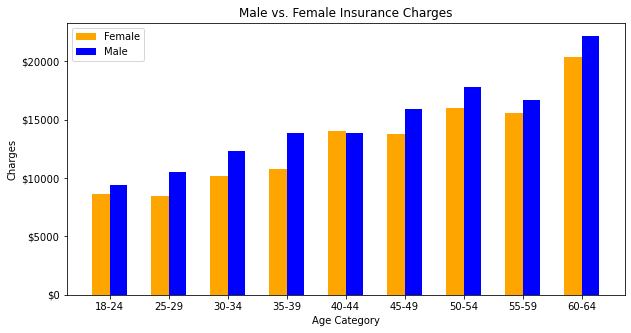

In [10]:
# Numbers of pairs of bars you want
N = 9

# Data on X-axis
# Specify the values of blue bars (height)
male_charges_by_age = insurance_df.loc[insurance_df["sex"] == "male"].groupby(["age_category"]).mean().dropna()["charges"]

# Specify the values of orange bars (height)
female_charges_by_age = insurance_df.loc[insurance_df["sex"] == "female"].groupby(["age_category"]).mean().dropna()["charges"]

# Position of bars on x-axis
ind = np.arange(N)

# Width of a bar 
width = 0.3       

# Figure size
fig, ax = plt.subplots(figsize=(10,5))
ax.yaxis.set_major_formatter('${x:1.0f}')

# Plotting
plt.bar(ind, female_charges_by_age, width, label='Female', color='orange')
plt.bar(ind + width, male_charges_by_age , width, label='Male', color='blue')

plt.xlabel('Age Category')
plt.ylabel('Charges')
plt.title('Male vs. Female Insurance Charges')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ("18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64"))


# Finding the best position for legends and putting it
plt.legend(loc='best')

plt.savefig("Images\males vs. female_charges_by_age.jpg")

plt.show()



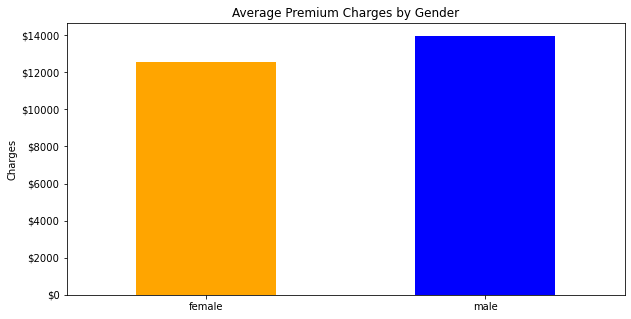

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
ax.yaxis.set_major_formatter('${x:1.0f}')

insurance_df.groupby(["sex"]).mean()["charges"].plot.bar(color=['orange','blue'])

ax.set(xlabel=None)

plt.xticks(rotation=0)

# plt.xlabel('Average Premium Charges by Sex')
plt.ylabel('Charges')
plt.title('Average Premium Charges by Gender')

plt.savefig("Images\males vs. females charges.jpg")

plt.show()